<a href="https://colab.research.google.com/github/rahulbarai07/Python_binance_eda/blob/main/python_binance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
apikey = 'VWWSuVHe4yu0w0MGVZ1RwWNvtCoe4PdUD8Zp63hCVZWRKndOBQAZY7qmHXdnGoQ5'
secret = 'cROpS4isxSDbDqdp7qvrTB11WgoqpbBXyY8W6HKu0MRHDORRP5DgSYgl5kTRwQoY'

In [ ]:
!pip install python-binance pandas mplfinance

5E365GCVNBJ5PNUR

In [ ]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [ ]:
client = Client(apikey, secret, tld='us')

In [ ]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'BTCUSD4', 'price': '22882.5400'},
 {'symbol': 'ETHUSD4', 'price': '1626.0300'},
 {'symbol': 'XRPUSD4', 'price': '0.2970'},
 {'symbol': 'BCHUSD4', 'price': '134.2000'},
 {'symbol': 'LTCUSD4', 'price': '96.2100'},
 {'symbol': 'USDTUSD4', 'price': '1.0003'},
 {'symbol': 'BTCUSDT', 'price': '85157.39000000'},
 {'symbol': 'ETHUSDT', 'price': '1600.71000000'},
 {'symbol': 'XRPUSDT', 'price': '2.08730000'},
 {'symbol': 'BCHUSDT', 'price': '338.40000000'},
 {'symbol': 'LTCUSDT', 'price': '76.21000000'},
 {'symbol': 'BNBUSD4', 'price': '325.6257'},
 {'symbol': 'BNBUSDT', 'price': '593.02000000'},
 {'symbol': 'ETHBTC', 'price': '0.01880000'},
 {'symbol': 'XRPBTC', 'price': '0.00000864'},
 {'symbol': 'BNBBTC', 'price': '0.00699300'},
 {'symbol': 'LTCBTC', 'price': '0.00090200'},
 {'symbol': 'BCHBTC', 'price': '0.00422000'},
 {'symbol': 'ADAUSD4', 'price': '0.3920'},
 {'symbol': 'BATUSD4', 'price': '0.2843'},
 {'symbol': 'ETCUSD4', 'price': '22.7276'},
 {'symbol': 'XLMUSD4', 'price': 

In [ ]:
tickers[6]['price']

'85157.39000000'

In [ ]:
# prompt: create a dataframe from tickers

import pandas as pd

# Assuming 'tickers' is already defined from the previous code
tickers_df = pd.DataFrame(tickers)
print(tickers_df)


       symbol       price
0     BTCUSD4  22882.5400
1     ETHUSD4   1626.0300
2     XRPUSD4      0.2970
3     BCHUSD4    134.2000
4     LTCUSD4     96.2100
..        ...         ...
569      SUSD  0.46630000
570     SUSDT  0.47930000
571   JTOUSDT  1.58300000
572  ORCAUSDT  2.77000000
573  DATAUSDT  0.01900000

[574 rows x 2 columns]


In [ ]:
tickers_df.set_index('symbol', inplace=True)
tickers_df.loc['BTCUSDT']

,BTCUSDT
price,85157.39000000


In [ ]:
depth = client.get_order_book(symbol='BTCUSDT')
depth

{'lastUpdateId': 2732554340,
 'bids': [['85157.38000000', '0.41538000'],
  ['85157.37000000', '0.04029000'],
  ['85157.35000000', '0.01181000'],
  ['85157.31000000', '0.37372000'],
  ['85116.79000000', '0.04178000'],
  ['85116.78000000', '0.00003000'],
  ['85049.29000000', '0.20010000'],
  ['85049.28000000', '0.04595000'],
  ['85049.27000000', '0.00008000'],
  ['85020.30000000', '0.17295000'],
  ['85018.00000000', '0.00176000'],
  ['84959.20000000', '0.16782000'],
  ['84921.66000000', '0.00008000'],
  ['84911.89000000', '0.00010000'],
  ['84891.40000000', '0.17236000'],
  ['84852.82000000', '0.24854000'],
  ['84852.81000000', '0.02310000'],
  ['84794.05000000', '0.00008000'],
  ['84771.80000000', '0.25012000'],
  ['84743.72000000', '0.00101000'],
  ['84695.40000000', '0.03068000'],
  ['84685.02000000', '0.00014000'],
  ['84683.79000000', '0.00002000'],
  ['84682.66000000', '0.00129000'],
  ['84666.44000000', '0.00008000'],
  ['84625.39000000', '0.00007000'],
  ['84613.39000000', '0.001

In [ ]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['price', 'Volume']
depth_df['price'] = pd.to_numeric(depth_df['price'])
depth_df['Volume'] = pd.to_numeric(depth_df['Volume'])
(depth_df.head())

,price,Volume
0,85199.96,0.02600
1,85200.00,1.98477
2,85200.06,0.00588
3,85200.79,0.04000
4,85212.69,0.00002


In [ ]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, "1 Apr, 2024", "15 Apr, 2025")
historical

[[1711929600000,
  '71322.38000000',
  '71322.38000000',
  '64555.01000000',
  '69335.89000000',
  '413.40237000',
  1712534399999,
  '27843390.75818330',
  59384,
  '192.36483000',
  '12997157.99520470',
  '0'],
 [1712534400000,
  '69255.01000000',
  '72740.20000000',
  '61723.97000000',
  '65780.16000000',
  '560.12394000',
  1713139199999,
  '38071338.94137910',
  75374,
  '267.17922000',
  '18306360.35583280',
  '0'],
 [1713139200000,
  '65826.97000000',
  '66824.65000000',
  '59631.64000000',
  '64957.64000000',
  '487.56584000',
  1713743999999,
  '30776918.45044520',
  62503,
  '234.62988000',
  '14817728.85694710',
  '0'],
 [1713744000000,
  '64957.64000000',
  '67176.25000000',
  '62500.00000000',
  '63137.36000000',
  '214.62403000',
  1714348799999,
  '13926745.31032860',
  34803,
  '108.58045000',
  '7057816.40841400',
  '0'],
 [1714348800000,
  '63137.36000000',
  '64690.43000000',
  '56603.15000000',
  '64021.14000000',
  '374.74737000',
  1714953599999,
  '22653536.51364

In [ ]:
historical_df = pd.DataFrame(historical)
historical_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1711929600000,71322.38000000,71322.38000000,64555.01000000,69335.89000000,413.40237000,1712534399999,27843390.75818330,59384,192.36483000,12997157.99520470,0
1,1712534400000,69255.01000000,72740.20000000,61723.97000000,65780.16000000,560.12394000,1713139199999,38071338.94137910,75374,267.17922000,18306360.35583280,0
2,1713139200000,65826.97000000,66824.65000000,59631.64000000,64957.64000000,487.56584000,1713743999999,30776918.45044520,62503,234.62988000,14817728.85694710,0
3,1713744000000,64957.64000000,67176.25000000,62500.00000000,63137.36000000,214.62403000,1714348799999,13926745.31032860,34803,108.58045000,7057816.40841400,0
4,1714348800000,63137.36000000,64690.43000000,56603.15000000,64021.14000000,374.74737000,1714953599999,22653536.51364850,48432,177.77637000,10788439.18477570,0


In [ ]:
# prompt: for two columns in historical_df namely the open time and close time, change the dtype from int to date time

import pandas as pd
historical_df['Open Time'] = pd.to_datetime(historical_df['Open Time'], unit='ms')
historical_df['Close Time'] = pd.to_datetime(historical_df['Close Time'], unit='ms')
historical_df.head()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2024-04-01,71322.38000000,71322.38000000,64555.01000000,69335.89000000,413.40237000,2024-04-07 23:59:59.999,27843390.75818330,59384,192.36483000,12997157.99520470,0
1,2024-04-08,69255.01000000,72740.20000000,61723.97000000,65780.16000000,560.12394000,2024-04-14 23:59:59.999,38071338.94137910,75374,267.17922000,18306360.35583280,0
2,2024-04-15,65826.97000000,66824.65000000,59631.64000000,64957.64000000,487.56584000,2024-04-21 23:59:59.999,30776918.45044520,62503,234.62988000,14817728.85694710,0
3,2024-04-22,64957.64000000,67176.25000000,62500.00000000,63137.36000000,214.62403000,2024-04-28 23:59:59.999,13926745.31032860,34803,108.58045000,7057816.40841400,0
4,2024-04-29,63137.36000000,64690.43000000,56603.15000000,64021.14000000,374.74737000,2024-05-05 23:59:59.999,22653536.51364850,48432,177.77637000,10788439.18477570,0


In [ ]:
# prompt: covert this historical_df to csv file allow to save locally

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
# ... (your existing code)

# Assuming 'historical_df' is already defined from the previous code

# Define the file path where you want to save the CSV file.
# You can specify a different directory or filename if needed.
file_path = '/content/historical_data.csv'  # Save in the Colab environment's /content directory

# Save the DataFrame to a CSV file
historical_df.to_csv(file_path, index=False)  # index=False prevents writing row indices to the CSV

# Download the CSV file to your local machine (using files in Colab)
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
historical_df.shape

(55, 12)

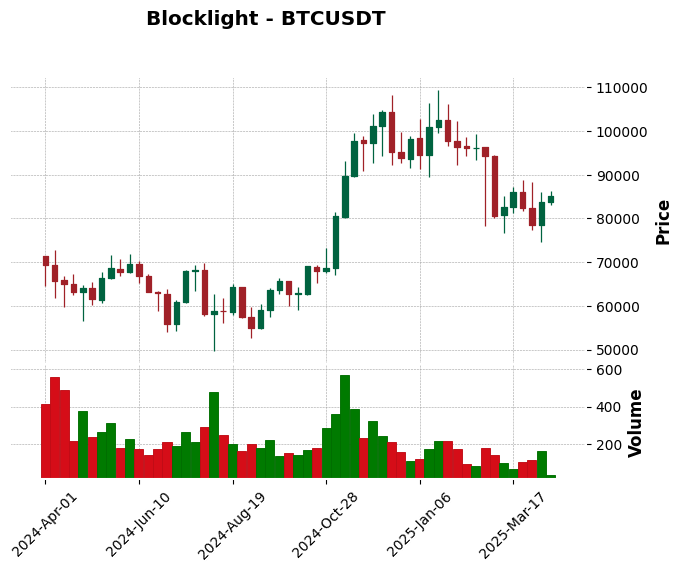

In [ ]:
# prompt: create a candle stick chart for historical_df, mention the title as Blocklight - BTCUSDT and convert all the object dtypes to float

# prompt: create a candle stick chart for historical_df, mention the title as Blocklight - BTCUSDT and convert all the object dtypes to float

import pandas as pd
import mplfinance as mpf

# Assuming historical_df is already defined and loaded

# Convert relevant columns to numeric, coercing errors to NaN
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']:
    historical_df[col] = pd.to_numeric(historical_df[col], errors='coerce')

# Set 'Open Time' as the index and convert it to DatetimeIndex
historical_df = historical_df.set_index('Open Time')
historical_df.index = pd.to_datetime(historical_df.index)


# Create the candlestick chart
mpf.plot(historical_df, type='candle', volume=True, title='Blocklight - BTCUSDT', style='charles')

In [ ]:
historical_df.shape

(55, 11)

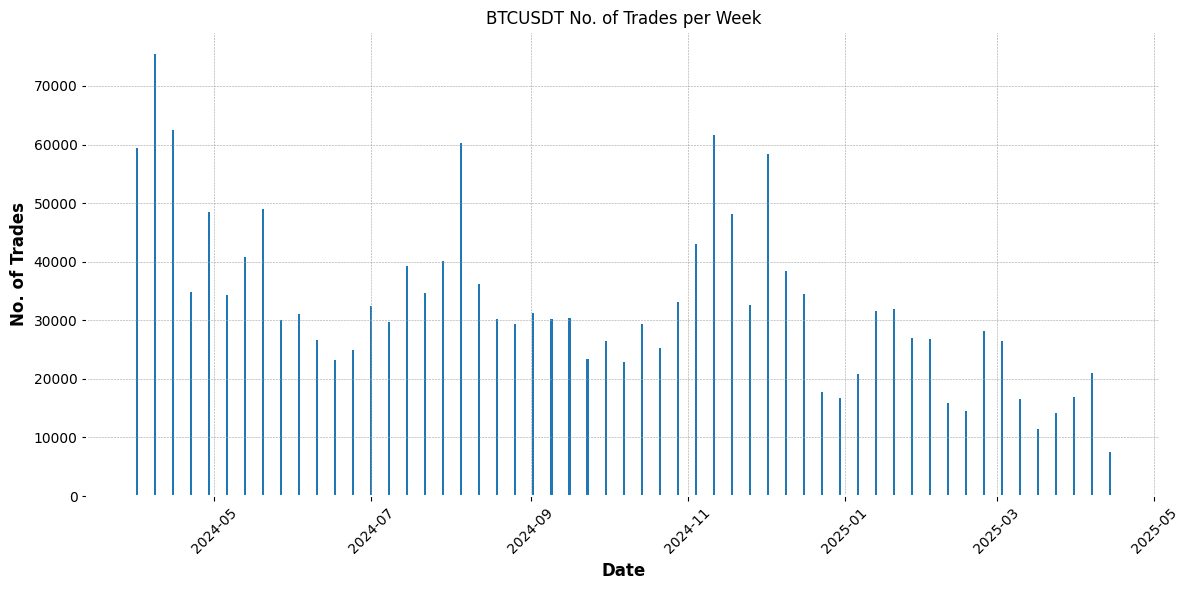

In [ ]:
# prompt: create a bar graph for historical_df

import matplotlib.pyplot as plt

# Assuming historical_df is already defined and processed as in the previous code

# Select the 'Close' column for the bar graph
number_of_trades = historical_df['Number of Trades']

# Create the bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(number_of_trades.index, number_of_trades.values)
plt.xlabel('Date')
plt.ylabel('No. of Trades')
plt.title('BTCUSDT No. of Trades per Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


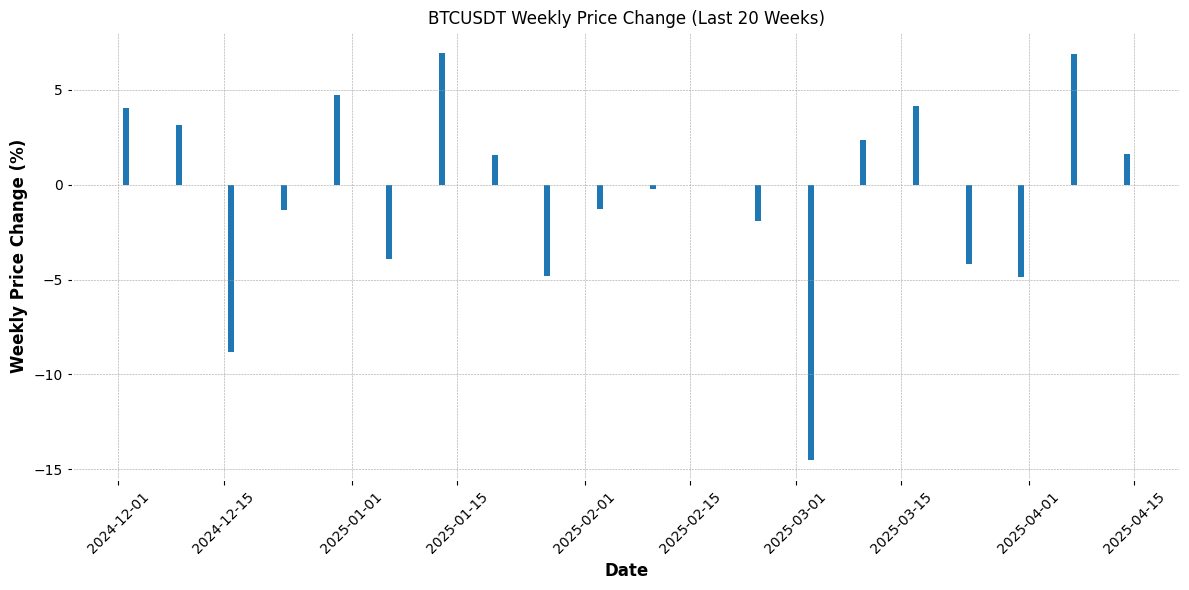

In [ ]:
# prompt: From the historical_df create a new dataframe which consist weekly price change percentage, and create a bar graph for past 20 candles.

import matplotlib.pyplot as plt
# Calculate weekly price change percentage
historical_df['Weekly_Price_Change'] = historical_df['Close'].pct_change() * 100

# Create a new DataFrame with the weekly price change percentage for the last 20 candles
last_20_candles = historical_df['Weekly_Price_Change'].tail(20)

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(last_20_candles.index, last_20_candles.values)
plt.xlabel('Date')
plt.ylabel('Weekly Price Change (%)')
plt.title('BTCUSDT Weekly Price Change (Last 20 Weeks)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-81-3f1cf5da6fa0>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn')  # Red-Yellow-Green colormap


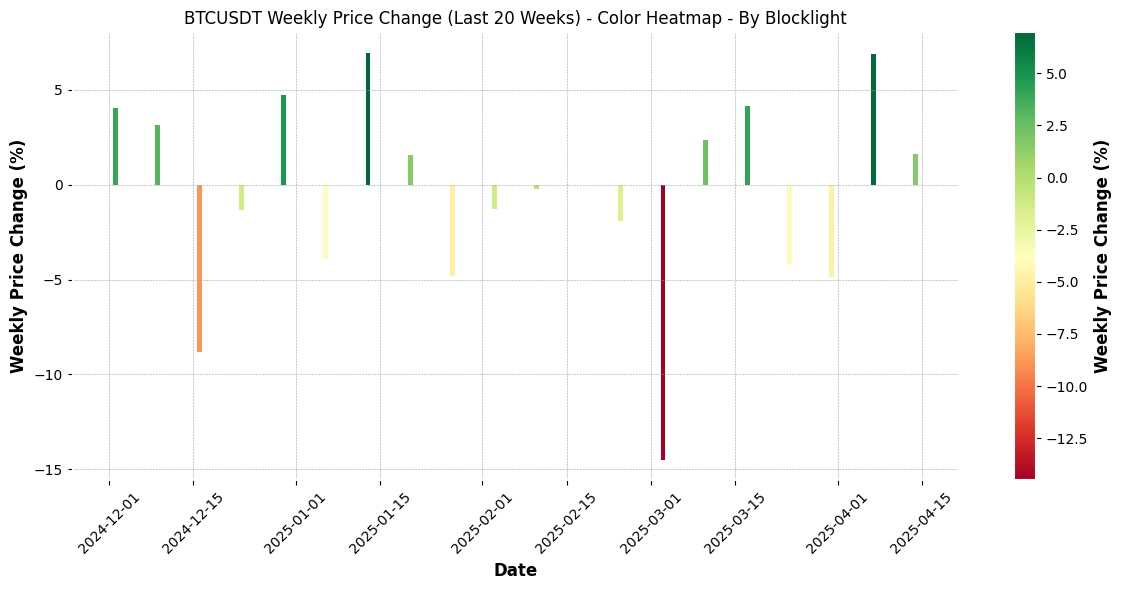

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming 'historical_df' and 'last_20_candles' are defined from the previous code

# Normalize the data to a 0-1 range for color mapping
norm = plt.Normalize(last_20_candles.min(), last_20_candles.max())

# Create a colormap
cmap = cm.get_cmap('RdYlGn')  # Red-Yellow-Green colormap

# Create the bar chart with colormap
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axes object
plt.bar(last_20_candles.index, last_20_candles.values, color=cmap(norm(last_20_candles.values)))

# Add a colorbar to show the mapping of values to colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for ScalarMappable
fig.colorbar(sm, ax=ax, label='Weekly Price Change (%)') # Associate the colorbar with the axes

# Customize labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Price Change (%)')
plt.title('BTCUSDT Weekly Price Change (Last 20 Weeks) - Color Heatmap - By Blocklight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

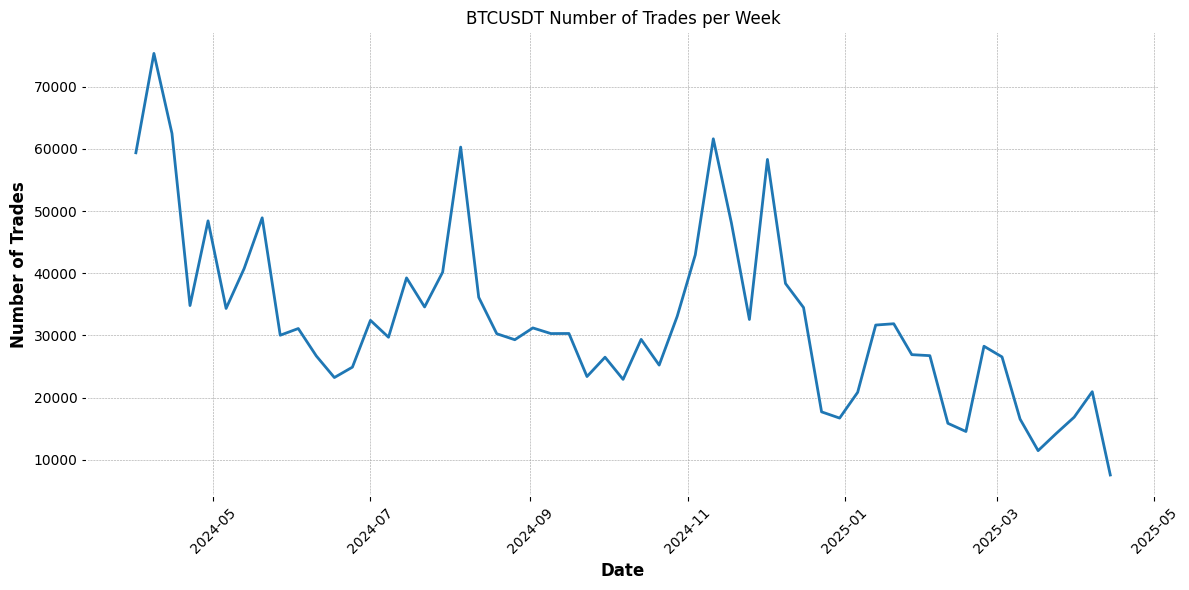

In [ ]:
# prompt: create a line graph for number of trades per week from the historical_df

import matplotlib.pyplot as plt

# Assuming historical_df is already defined and processed

# Select the 'Number of Trades' column and its index for the line graph
number_of_trades = historical_df['Number of Trades']
dates = historical_df.index

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(dates, number_of_trades)
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.title('BTCUSDT Number of Trades per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
